In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv("./assets/BreastCancer.csv")
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


In [4]:
df_x = df.iloc[:,1:-1]
y = df.Class
df_x

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train)

In [6]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [7]:
X_test

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,4,8,8,5,4,5,10,4,1
1,5,1,1,1,2,1,2,1,1
2,5,2,1,1,2,1,1,1,1
3,1,1,1,1,1,1,2,1,1
4,5,1,3,3,2,2,2,3,1
...,...,...,...,...,...,...,...,...,...
132,2,1,1,1,2,1,2,2,1
133,8,7,8,7,5,5,5,10,2
134,3,1,1,1,2,1,3,1,1
135,5,4,5,1,8,1,3,6,1


# Gaussian Naive Bayes


In [8]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_val, y_val)

0.975609756097561

In [9]:
y_gnb_predicted = gnb.predict(X_test)
print(f'Model accuracy score: {accuracy_score(y_gnb_predicted, y_test)}')


Model accuracy score: 0.948905109489051


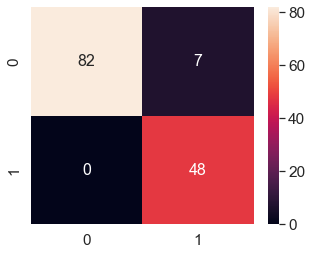

array([[82,  7],
       [ 0, 48]], dtype=int64)

In [10]:
plt.figure(figsize=(5,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(y_test, y_gnb_predicted), annot=True, annot_kws={"size": 16}) # font size
plt.show()

confusion_matrix(y_test, y_gnb_predicted)


# Bernoulli Naive Bayes


In [11]:
clf_b = BernoulliNB()
clf_b.fit(X_train, y_train)
clf_b.score(X_val, y_val)

0.6463414634146342

In [12]:
y_clfb_predicted = clf_b.predict(X_test)
print(f'Model accuracy score: {accuracy_score(y_clfb_predicted, y_test)}')

Model accuracy score: 0.6496350364963503


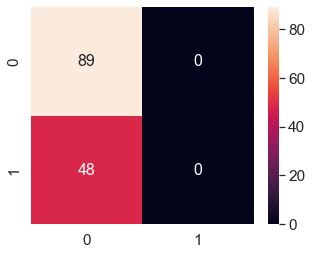

array([[89,  0],
       [48,  0]], dtype=int64)

In [13]:
plt.figure(figsize=(5,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(y_test, y_clfb_predicted), annot=True, annot_kws={"size": 16}) # font size
plt.show()

confusion_matrix(y_test, y_clfb_predicted)


# CategoricalNB

In [14]:
clf_c = CategoricalNB()
clf_c.fit(X_train, y_train)
clf_c.score(X_val, y_val)

0.975609756097561

In [15]:
y_clfc_predicted = clf_c.predict(X_test)
print(f'Model accuracy score: {accuracy_score(y_clfc_predicted, y_test)}')

Model accuracy score: 0.9635036496350365


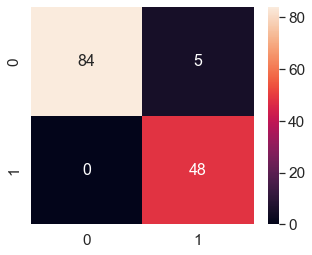

array([[84,  5],
       [ 0, 48]], dtype=int64)

In [16]:
plt.figure(figsize=(5,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(y_test, y_clfc_predicted), annot=True, annot_kws={"size": 16}) # font size
plt.show()

confusion_matrix(y_test, y_clfc_predicted)


# Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

scores_gnb = cross_val_score(gnb, df_x, y, cv = 5, scoring='accuracy')
scores_clf_b = cross_val_score(clf_b, df_x, y, cv = 5, scoring='accuracy')
scores_clf_c = cross_val_score(clf_c, df_x, y, cv = 5, scoring='accuracy')

print('Cross-validation_Gaussian scores:{}'.format(scores_gnb))
print('Cross-validation_Bernoulli scores:{}'.format(scores_clf_b))
print('Cross-validation_Categorical scores:{}'.format(scores_clf_c))

Cross-validation_Gaussian scores:[0.94160584 0.93430657 0.97080292 0.97058824 0.97794118]
Cross-validation_Bernoulli scores:[0.64963504 0.64963504 0.64963504 0.65441176 0.64705882]
Cross-validation_Categorical scores:[0.97080292 0.94890511 0.97810219 0.98529412 0.97794118]


In [23]:
print('Average cross-validation_Gaussian score: {:.4f}'.format(scores_gnb.mean()))
print('Average cross-validation_Bernoulli score: {:.4f}'.format(scores_clf_b.mean()))
print('Average cross-validation_Categorical score: {:.4f}'.format(scores_clf_c.mean()))

Average cross-validation_Gaussian score: 0.9590
Average cross-validation_Bernoulli score: 0.6501
Average cross-validation_Categorical score: 0.9722
